# [Import necessary packages & set plot style]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import seaborn as sns
import folium
import re
from IPython.display import Image
from collections import OrderedDict
# import

%matplotlib inline

In [2]:
plt.style.use('ggplot')
#plt.style.use('classic')

# [Load the dataset & get it ready]

In [3]:
df = pd.read_csv('collision_2009_2018.csv', parse_dates=(['COLLISION_DATE']))
df.head()

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_PED_KILLED,COUNT_PED_INJURED,COUNT_BICYCLIST_KILLED,COUNT_BICYCLIST_INJURED,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE
0,3918943,2009,20091202,1942,2009-03-23,1745,35046,1283,1,5,...,0,0,0,0,0,0,-,-,NaN,NaN
1,3984219,2009,20090115,1942,2009-01-03,540,33829,1701,6,5,...,0,0,0,0,0,0,-,-,NaN,NaN
2,3984274,2009,20090126,1942,2009-01-07,630,38614,152,3,5,...,1,0,0,0,0,0,-,-,NaN,NaN
3,3984281,2009,20090126,1942,2009-01-08,50,32896,1985,4,5,...,0,0,0,0,0,0,-,-,NaN,NaN
4,3984352,2009,20100914,1942,2009-01-11,1450,24517,2014,7,5,...,0,0,0,0,1,0,-,-,NaN,NaN


In [4]:
victim_df = pd.read_csv('victim_2009_2018.csv')
victim_df.head()

,CASE_ID,PARTY_NUMBER,VICTIM_ROLE,VICTIM_SEX,VICTIM_AGE,VICTIM_DEGREE_OF_INJURY,VICTIM_SEATING_POSITION,VICTIM_SAFETY_EQUIP_1,VICTIM_SAFETY_EQUIP_2,VICTIM_EJECTED
0,3918943,2,1,M,25,4,1,N,G,0
1,3984219,1,1,M,19,1,1,L,G,0
2,3984274,2,3,F,58,1,9,-,-,0
3,3984281,1,1,M,29,1,1,L,H,0
4,3984352,1,2,F,998,0,3,L,G,0


In [5]:
party_df = pd.read_csv('party_2009_2018.csv')
party_df.head()

/Users/Chenlin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CASE_ID,PARTY_NUMBER,PARTY_TYPE,AT_FAULT,PARTY_SEX,PARTY_AGE,PARTY_SOBRIETY,PARTY_DRUG_PHYSICAL,DIR_OF_TRAVEL,PARTY_SAFETY_EQUIP_1,...,MOVE_PRE_ACC,VEHICLE_YEAR,VEHICLE_MAKE,STWD_VEHICLE_TYPE,CHP_VEH_TYPE_TOWING,CHP_VEH_TYPE_TOWED,RACE,INATTENTION,SPECIAL_INFO_F,SPECIAL_INFO_G
0,3918943,1,1,Y,M,55,H,H,S,-,...,B,1994.0,FORD,-,-,0,B,NaN,-,-
1,3918943,2,1,N,M,25,H,H,S,-,...,A,2007.0,NISSAN,-,-,0,B,NaN,-,-
2,3984219,1,1,Y,M,19,G,G,S,L,...,B,2004.0,TOYOTA,A,1,0,H,NaN,-,-
3,3984274,1,1,Y,M,56,A,-,W,M,...,E,2002.0,OTHER - BUS,I,20,0,H,NaN,-,-
4,3984274,2,2,N,F,58,A,-,W,-,...,B,NaN,-,N,60,0,W,NaN,-,-


### Examine columns and make all headers lower case

In [6]:
df.columns

Index(['CASE_ID', 'ACCIDENT_YEAR', 'PROC_DATE', 'JURIS', 'COLLISION_DATE',
       'COLLISION_TIME', 'OFFICER_ID', 'REPORTING_DISTRICT', 'DAY_OF_WEEK',
       'CHP_SHIFT', 'POPULATION', 'CNTY_CITY_LOC', 'SPECIAL_COND', 'BEAT_TYPE',
       'CHP_BEAT_TYPE', 'CITY_DIVISION_LAPD', 'CHP_BEAT_CLASS', 'BEAT_NUMBER',
       'PRIMARY_RD', 'SECONDARY_RD', 'DISTANCE', 'DIRECTION', 'INTERSECTION',
       'WEATHER_1', 'WEATHER_2', 'STATE_HWY_IND', 'CALTRANS_COUNTY',
       'CALTRANS_DISTRICT', 'STATE_ROUTE', 'ROUTE_SUFFIX', 'POSTMILE_PREFIX',
       'POSTMILE', 'LOCATION_TYPE', 'RAMP_INTERSECTION', 'SIDE_OF_HWY',
       'TOW_AWAY', 'COLLISION_SEVERITY', 'NUMBER_KILLED', 'NUMBER_INJURED',
       'PARTY_COUNT', 'PRIMARY_COLL_FACTOR', 'PCF_CODE_OF_VIOL',
       'PCF_VIOL_CATEGORY', 'PCF_VIOLATION', 'PCF_VIOL_SUBSECTION',
       'HIT_AND_RUN', 'TYPE_OF_COLLISION', 'MVIW', 'PED_ACTION',
       'ROAD_SURFACE', 'ROAD_COND_1', 'ROAD_COND_2', 'LIGHTING',
       'CONTROL_DEVICE', 'CHP_ROAD_TYPE', 'PEDESTRIAN_

In [7]:
victim_df.columns

Index(['CASE_ID', 'PARTY_NUMBER', 'VICTIM_ROLE', 'VICTIM_SEX', 'VICTIM_AGE',
       'VICTIM_DEGREE_OF_INJURY', 'VICTIM_SEATING_POSITION',
       'VICTIM_SAFETY_EQUIP_1', 'VICTIM_SAFETY_EQUIP_2', 'VICTIM_EJECTED'],
      dtype='object')

In [8]:
party_df.columns

Index(['CASE_ID', 'PARTY_NUMBER', 'PARTY_TYPE', 'AT_FAULT', 'PARTY_SEX',
       'PARTY_AGE', 'PARTY_SOBRIETY', 'PARTY_DRUG_PHYSICAL', 'DIR_OF_TRAVEL',
       'PARTY_SAFETY_EQUIP_1', 'PARTY_SAFETY_EQUIP_2', 'FINAN_RESPONS',
       'SP_INFO_1', 'SP_INFO_2', 'SP_INFO_3', 'OAF_VIOLATION_CODE',
       'OAF_VIOL_CAT', 'OAF_VIOL_SECTION', 'OAF_VIOLATION_SUFFIX', 'OAF_1',
       'OAF_2', 'PARTY_NUMBER_KILLED', 'PARTY_NUMBER_INJURED', 'MOVE_PRE_ACC',
       'VEHICLE_YEAR', 'VEHICLE_MAKE', 'STWD_VEHICLE_TYPE',
       'CHP_VEH_TYPE_TOWING', 'CHP_VEH_TYPE_TOWED', 'RACE', 'INATTENTION',
       'SPECIAL_INFO_F', 'SPECIAL_INFO_G'],
      dtype='object')

In [9]:
# lower() all headers
df.columns = map(str.lower, df.columns)
df.head()

,case_id,accident_year,proc_date,juris,collision_date,collision_time,officer_id,reporting_district,day_of_week,chp_shift,...,count_ped_killed,count_ped_injured,count_bicyclist_killed,count_bicyclist_injured,count_mc_killed,count_mc_injured,primary_ramp,secondary_ramp,latitude,longitude
0,3918943,2009,20091202,1942,2009-03-23,1745,35046,1283,1,5,...,0,0,0,0,0,0,-,-,NaN,NaN
1,3984219,2009,20090115,1942,2009-01-03,540,33829,1701,6,5,...,0,0,0,0,0,0,-,-,NaN,NaN
2,3984274,2009,20090126,1942,2009-01-07,630,38614,152,3,5,...,1,0,0,0,0,0,-,-,NaN,NaN
3,3984281,2009,20090126,1942,2009-01-08,50,32896,1985,4,5,...,0,0,0,0,0,0,-,-,NaN,NaN
4,3984352,2009,20100914,1942,2009-01-11,1450,24517,2014,7,5,...,0,0,0,0,1,0,-,-,NaN,NaN


In [10]:
victim_df.columns = map(str.lower, victim_df.columns)
victim_df.head()

,case_id,party_number,victim_role,victim_sex,victim_age,victim_degree_of_injury,victim_seating_position,victim_safety_equip_1,victim_safety_equip_2,victim_ejected
0,3918943,2,1,M,25,4,1,N,G,0
1,3984219,1,1,M,19,1,1,L,G,0
2,3984274,2,3,F,58,1,9,-,-,0
3,3984281,1,1,M,29,1,1,L,H,0
4,3984352,1,2,F,998,0,3,L,G,0


In [11]:
party_df.columns = map(str.lower, party_df.columns)
party_df.head()

,case_id,party_number,party_type,at_fault,party_sex,party_age,party_sobriety,party_drug_physical,dir_of_travel,party_safety_equip_1,...,move_pre_acc,vehicle_year,vehicle_make,stwd_vehicle_type,chp_veh_type_towing,chp_veh_type_towed,race,inattention,special_info_f,special_info_g
0,3918943,1,1,Y,M,55,H,H,S,-,...,B,1994.0,FORD,-,-,0,B,NaN,-,-
1,3918943,2,1,N,M,25,H,H,S,-,...,A,2007.0,NISSAN,-,-,0,B,NaN,-,-
2,3984219,1,1,Y,M,19,G,G,S,L,...,B,2004.0,TOYOTA,A,1,0,H,NaN,-,-
3,3984274,1,1,Y,M,56,A,-,W,M,...,E,2002.0,OTHER - BUS,I,20,0,H,NaN,-,-
4,3984274,2,2,N,F,58,A,-,W,-,...,B,NaN,-,N,60,0,W,NaN,-,-


### Drop unnecessary columns

In [12]:
df.drop(['officer_id', 'reporting_district', 'chp_shift', 'cnty_city_loc', 'beat_type', 'chp_beat_type', 'city_division_lapd',
         'chp_beat_class', 'beat_number', 'caltrans_county', 'caltrans_district'], axis=1, inplace=True)

In [13]:
victim_df.drop(['victim_seating_position', 'victim_ejected'], axis=1, inplace=True)

In [14]:
party_df.drop(['at_fault', 'dir_of_travel', 'party_safety_equip_1', 'party_safety_equip_2', 'oaf_violation_code', 'oaf_viol_cat', 'party_number_killed', 'party_number_injured','stwd_vehicle_type', 'chp_veh_type_towing', 'chp_veh_type_towed'], axis=1, inplace=True)

### Traffic Count Dataframe

In [15]:
df_count = pd.read_csv('LADOT_Traffic_Counts_Summary.csv', parse_dates=(['Count Date']))
# Not necessary: pd.to_datetime(df_count['Count Date']).to_frame()


# Change the street names to upper case and remove space between integer and string
df_count['Primary Street'] = [re.sub('(\\d)\\s+', '\\1', (x.upper())) for x in df_count['Primary Street']]
df_count['Cross Street'] = [re.sub('(\\d)\\s+', '\\1', (x.upper())) for x in df_count['Cross Street']]

df_count = df_count[(df_count['Type'] == 'AUTO') | (df_count['Type'] == 'MAN')]

df_count_merge = pd.merge(df, df_count, left_on=['primary_rd', 'secondary_rd'], right_on=['Primary Street', 'Cross Street'], how='left')
df_count_merge = df_count_merge.groupby(['primary_rd', 'secondary_rd']).agg({'case_id': 'count', 'Total': 'mean'})
df_count_merge.reset_index(level=[0, 1], inplace=True)

### Set index

In [16]:
df.set_index('accident_year', inplace=True)
df.head()

,case_id,proc_date,juris,collision_date,collision_time,day_of_week,population,special_cond,primary_rd,secondary_rd,...,count_ped_killed,count_ped_injured,count_bicyclist_killed,count_bicyclist_injured,count_mc_killed,count_mc_injured,primary_ramp,secondary_ramp,latitude,longitude
accident_year,,,,,,,,,,,,,,,,,,,,,
2009,3918943,20091202,1942,2009-03-23,1745,1,7,0,WESTERN AV,CENTURY BL,...,0,0,0,0,0,0,-,-,NaN,NaN
2009,3984219,20090115,1942,2009-01-03,540,6,7,0,TAMPA AV,PINE VALLEY AV,...,0,0,0,0,0,0,-,-,NaN,NaN
2009,3984274,20090126,1942,2009-01-07,630,3,7,0,5TH ST,FLOWER ST,...,1,0,0,0,0,0,-,-,NaN,NaN
2009,3984281,20090126,1942,2009-01-08,50,4,7,0,VAN NUYS BL,VESPER AV,...,0,0,0,0,0,0,-,-,NaN,NaN
2009,3984352,20100914,1942,2009-01-11,1450,7,7,0,HARVARD BL,3RD ST,...,0,0,0,0,1,0,-,-,NaN,NaN


# [Data cleaning & manipulation]

### Day of week code to label

In [17]:
# day of week dictionary
dowdict = {1: 'Monday',
           2: 'Tuesday',
           3: 'Wednesday',
           4: 'Thursday',
           5: 'Friday',
           6: 'Saturday',
           7: 'Sunday'
          }

# replacing code values to labels inplace 
df['day_of_week'].replace(to_replace=[i for i in range(1, 8)], value=[dowdict[i] for i in range(1, 8)], inplace=True)

### Type of Collision code to label

In [18]:
tocdict = {'A': 'Head-On',
           'B': 'Sideswipe',
           'C': 'Rear End',
           'D': 'Broadside',
           'E': 'Hit Object',
           'F': 'Overturned',
           'G': 'Vehicle/Pedestrian',
           'H': 'Other',
           '-': 'Not Stated'
          }

# replacing code values to labels inplace 
df['type_of_collision'].replace(to_replace=[i for i in tocdict.keys()], value=[i for i in tocdict.values()], inplace=True)

### Violation category code to label

In [19]:
# violation category dictionary
vcdict = {'0': 'Unknown',
          '1': 'Driving or Bicycling Under the Influence of Alcohol or Drug',
          '2': 'Impeding Traffic',
          '3': 'Unsafe Speed',
          '4': 'Following Too Closely',
          '5': 'Wrong Side of Road',
          '6': 'Improper Passing',
          '7': 'Unsafe Lane Change',
          '8': 'Improper Turning',
          '9': 'Automobile Right of Way',
          '10': 'Pedestrian Right of Way',
          '11': 'Pedestrian Violation',
          '12': 'Traffic Signals and Signs',
          '13': 'Hazardous Parking',
          '14': 'Lights',
          '15': 'Brakes',
          '16': 'Other Equipment',
          '17': 'Other Hazardous Violation',
          '18': 'Other Than Driver (or Pedestrian)',
          '19': None,
          '20': None,
          '21': 'Unsafe Starting or Backing',
          '22': 'Other Improper Driving',
          '23': 'Pedestrian or "Other" Under the Influence of Alcohol or Drug',
          '24': 'Fell Asleep',
          '- ': 'Not Stated'
          }

# replacing code values to labels inplace 
df['pcf_viol_category'].replace(to_replace=[i for i in vcdict.keys()], value=[i for i in vcdict.values()], inplace=True)

### Collision severity code to label

In [20]:
csdict = {0: 'Property Damage Only',
          1: 'Injury level 4: Fatal',
          2: 'Injury level 3: Severe',
          3: 'Injury level 2: Other Visible',
          4: 'Injury level 1: Complaint of Pain'
          }

# replacing code values to labels inplace 
df['collision_severity'].replace(to_replace=[i for i in range(0, 5)], value=[csdict[i] for i in range(0, 5)], inplace=True)

### Location type code to label

In [21]:
ltdict = {'H': 'Highway',
          'I': 'Intersection',
          'R': 'Ramp'
          }

# replacing code values to labels inplace 
df['location_type'].replace(to_replace=[i for i in ltdict.keys()], value=[i for i in ltdict.values()], inplace=True)

### Weather code to label

In [22]:
weatherdict = {'A': 'Clear',
               'B': 'Cloudy',
               'C': 'Raining',
               'D': 'Snowing',
               'E': 'Fog',
               'F': 'Other',
               'G': 'Wind',
               '- ': 'Not stated'
              }

# replacing code values to labels inplace 
df['weather_1'].replace(to_replace=[i for i in weatherdict.keys()], value=[i for i in weatherdict.values()], inplace=True)

### Road surface code to label

In [23]:
roaddict = {'A': 'Dry',
            'B': 'Wet',
            'C': 'Snowy or Icy',
            'D': 'Muddy or Oily',
            '- ': 'Not stated'
              }

# replacing code values to labels inplace 
df['road_surface'].replace(to_replace=[i for i in roaddict.keys()], value=[i for i in roaddict.values()], inplace=True)

### Road condition code to label

In [24]:
roadcondict = {'A': 'Holes, Deep Ruts',
            'B': 'Loose Material on Roadway',
            'C': 'Obstruction on Roadway',
            'D': 'Construction or Repair Zone',
            'E': 'Reduced Roadway Width',
            'F': 'Flooded',
            'G': 'Other',
            'H': 'No Unusual Condition',
            '- ': 'Not Stated'
              }

# replacing code values to labels inplace 
df['road_cond_1'].replace(to_replace=[i for i in roadcondict.keys()], value=[i for i in roadcondict.values()], inplace=True)

### Victim DataFrame - Injury Level

In [25]:
victim_injdict = {1: 'Killed',
                  2: 'Severe Injury',
                  3: 'Other Visible Injury',
                  4: 'Complaint of Pain',
                  0: 'No Injury',
                  5: 'Unknown',
                  6: 'Unknown',
                  7: 'Unknown'
                 } 

victim_df['victim_degree_of_injury'].replace(to_replace=[i for i in victim_injdict.keys()],
                                             value=[i for i in victim_injdict.values()],
                                             inplace=True)

### Party DataFrame - Sobriety Level

In [26]:
party_sobdict = {'A': 'No Drinking',
                 'B': 'Drank & Under Influence',
                 'C': 'Drank & Not Under Influence',
                 'D': 'Drank & Impairment Unknown',
                 'G': 'Impairement Unknown',
                 'H': 'Not Applicable',
                 '-': 'Not Applicable'
                 } 

party_df['party_sobriety'].replace(to_replace=[i for i in party_sobdict.keys()],
                                             value=[i for i in party_sobdict.values()],
                                             inplace=True)

### Party DataFrame - Special Info 2 (cell phone)

In [27]:
party_celldict = {'B': 'Cell Phone in Use',
                 'C': 'Cell Phone Not in Use',
                 'D': 'Unknown',
                 '-': 'Unknown',
                 '1': 'Unknown',
                 '2': 'Unknown',
                 '3': 'Unknown'
                 } 

party_df['sp_info_2'].replace(to_replace=[i for i in party_celldict.keys()],
                                             value=[i for i in party_celldict.values()],
                                             inplace=True)

### Party DataFrame - Race 

In [28]:
party_racedict = {'A': 'Asian',
                 'B': 'Black',
                 'H': 'Hispanic',
                 'W': 'White',
                 'O': 'Other',
                 np.nan: 'Unknown',
                 } 

party_df['race'].replace(to_replace=[i for i in party_racedict.keys()],
                                             value=[i for i in party_racedict.values()],
                                             inplace=True)

### Alcohol involved labeling
alcohol_involved is either 'Y' or NaN. This replaces NaN with 'N' to facilitate reporting. 

*Note* this makes an assumption that NaN values mean it was determined that alcohol was not involved. That might be overreaching so let's consider this to mean there was no alcohol use *reported* in the incident report. 

In [29]:
df['alcohol_involved'].replace(np.nan, 'N', inplace=True)

### Time of day values to category (time period)
- Early morning: 12AM - 6AM
- AM Peak: 6AM - 9:30AM
- Midday: 9:30AM - 2PM
- PM Peak: 2PM - 6:30PM
- Evening: 6:30PM - 12AM

**Time period based on LA Metro time period definition

In [30]:
ranges = [0, 600, 930, 1400, 1830, 2400]
labels = ['Early Morning', 'AM Peak', 'Midday', 'PM Peak', 'Evening']
df['time_period'] = pd.cut(df['collision_time'], ranges, labels=labels).astype('category')

### Time of day values to hour of day

In [31]:
ranges = list(np.arange(0, 2401, 100))
labels = list(np.arange(0, 24))
df['hour_of_day'] = pd.cut(df['collision_time'], ranges, labels=labels).astype('category')

### victim DataFrame cleaning

In [32]:
victim_df['victim_age'].unique()
#998 is not stated - replace with NaN
#999 is fatal fetus - replace with age 0 for now; there are 6 of them :(

array([ 25,  19,  58,  29, 998,   2,  20,  34,  32,  54,  42,  12,  53,
        50,  51,  38,  55,  18,  27,  37,  69,  81,  36,  26,  33,  46,
        15,  13,  82,  73,  52,  59,  60,  28,  21,  39,  62,  31,  30,
        57,  76,   5,  44,  63,  17,  40,  56,  41,   0,  68,  75,  83,
        79,  49,  48,  24,  23,  61,  43,  22,  16,  35,  45,  64,  65,
        66,  74,   1,  47,   4,  11,   3,  10,  70,   9,   6,   8,   7,
        14,  84,  80,  87,  72,  67,  77,  71,  86,  94,  78, 100,  88,
        85,  90,  89,  96,  91,  97,  92,  93,  98,  95, 102, 103,  99,
       124, 106, 999, 107, 105, 104, 125, 123, 101, 114, 110, 119, 111,
       109])

In [33]:
victim_df['victim_age'].replace({998: np.nan, 999: 0}, inplace=True)
victim_df['victim_sex'].replace('-', np.nan, inplace=True)

In [34]:
victim_df['victim_degree_of_injury'].unique()
# Need to drop Unknown because Unknown represents codes not present in codebook

array(['Complaint of Pain', 'Killed', 'No Injury', 'Other Visible Injury',
       'Severe Injury', 'Unknown'], dtype=object)

In [35]:
victim_df = victim_df[victim_df['victim_degree_of_injury'] != 'Unknown']

### party_df ---> victim_df = victim_party_df

In [36]:
victim_party_df = pd.merge(victim_df,
                           party_df,
                           how='left',
                           left_on=['case_id', 'party_number'],
                           right_on=['case_id', 'party_number']
                          )
victim_party_df.head()

,case_id,party_number,victim_role,victim_sex,victim_age,victim_degree_of_injury,victim_safety_equip_1,victim_safety_equip_2,party_type,party_sex,...,oaf_violation_suffix,oaf_1,oaf_2,move_pre_acc,vehicle_year,vehicle_make,race,inattention,special_info_f,special_info_g
0,3918943,2,1,M,25.0,Complaint of Pain,N,G,1,M,...,NaN,N,-,A,2007.0,NISSAN,Black,NaN,-,-
1,3984219,1,1,M,19.0,Killed,L,G,1,M,...,NaN,O,-,B,2004.0,TOYOTA,Hispanic,NaN,-,-
2,3984274,2,3,F,58.0,Killed,-,-,2,F,...,NaN,N,-,B,NaN,-,White,NaN,-,-
3,3984281,1,1,M,29.0,Killed,L,H,1,M,...,A,A,-,B,2007.0,ACURA,White,NaN,-,-
4,3984352,1,2,F,NaN,No Injury,L,G,1,F,...,NaN,N,-,B,2003.0,HYUNDAI,Unknown,NaN,-,-


# [Analysis Section]

In [37]:
print("The Dataset has {:,} rows/incidents and {:,} attributes/columns.".format(df.shape[0], df.shape[1]))
print("Among the {:,} incidents, {:,} were fatal.".format(df.shape[0], len(df[df['collision_severity'] == 'Injury level 4: Fatal'])))

The Dataset has 355,488 rows/incidents and 66 attributes/columns.
Among the 355,488 incidents, 1,885 were fatal.


### Collisions by Year

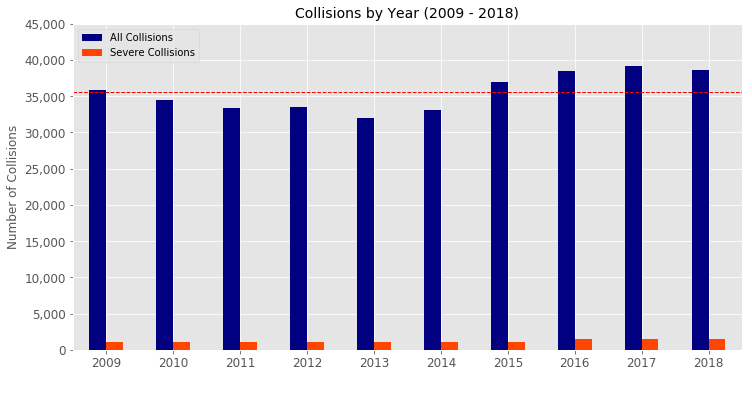

In [38]:
# Total collisions & severe collisions by year side by side

col_injury_fatal_year = df.groupby('accident_year')['collision_severity'].agg([('All Collisions', len),
                                                                          ('Severe Collisions', lambda x: ((x == 'Injury level 3: Severe') | (x == 'Injury level 4: Fatal')).sum()),
                                                                          ('Percent of Severe Collisions', lambda x: ((x == 'Injury level 3: Severe') | (x == 'Injury level 4: Fatal')).mean())])

ax = col_injury_fatal_year[['All Collisions', 'Severe Collisions']].plot(kind='bar', rot=0, figsize=(12, 6), color=['navy', 'orangered'])
ax.set_title('Collisions by Year (2009 - 2018)', fontsize=14)
ax.set_ylabel('Number of Collisions')
ax.set_xlabel(' ')
ax.set_ylim([0, 45000])
ax.legend(loc='upper left')

fmt = '{x:,.0f}'
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

ax.axhline(col_injury_fatal_year['All Collisions'].mean(), color='red', linestyle='dashed', linewidth=1)

# plt.savefig('Collisions & Severe Collisions by Year.png')

pass

### Bike & ped collision by year

In [39]:
bp_collision = df[(df['bicycle_accident'] == 'Y') | (df['pedestrian_accident'] == 'Y')][['bicycle_accident', 'pedestrian_accident', 'collision_severity']]


bp_collision = bp_collision.groupby('accident_year').agg({'bicycle_accident': 'count',
                                                          'pedestrian_accident': 'count',
                                                          'collision_severity': lambda x: ((x == 'Injury level 3: Severe') | (x == 'Injury level 4: Fatal')).sum()})

bp_collision['bike_ped_collision'] = bp_collision['bicycle_accident'] + bp_collision['pedestrian_accident']
bp_collision['rate_of_severe_collision'] = bp_collision['collision_severity'] / bp_collision['bike_ped_collision']
bp_collision.rename(columns={'bicycle_accident': 'Bicycle Accident',
                             'pedestrian_accident': 'Pedestrian Accident',
                             'collision_severity': 'Severe Collisions',
                             'bike_ped_collision': 'Bike & Ped Collisions',
                             'rate_of_severe_collision': 'Percent of Severe Bike & Ped Collisions'}, inplace=True)

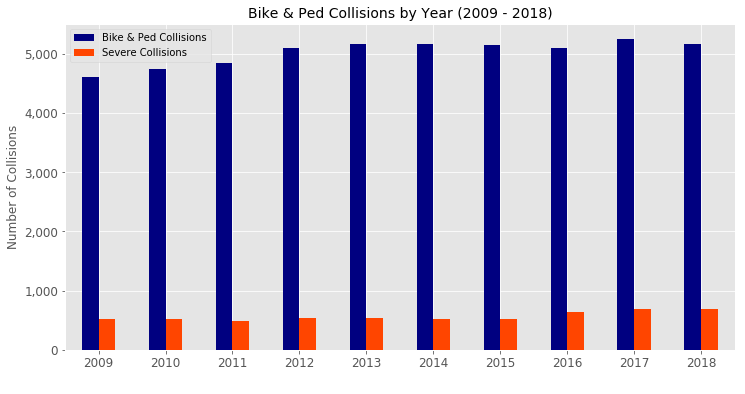

In [40]:
ax = bp_collision[['Bike & Ped Collisions', 'Severe Collisions']].plot(kind='bar', rot=0, figsize=(12, 6), color=['navy', 'orangered'])
ax.set_title('Bike & Ped Collisions by Year (2009 - 2018)', fontsize=14)
ax.set_ylabel('Number of Collisions')
ax.set_xlabel(' ')
ax.legend(loc='upper left')

fmt = '{x:,.0f}'
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

# plt.savefig('Bike & Ped Collisions by Year.png')

pass

In [41]:
# All Collision & Bike/Ped Collision Comparison
bp_temp = bp_collision[['Bike & Ped Collisions', 'Percent of Severe Bike & Ped Collisions']]
col_temp = col_injury_fatal_year[['All Collisions', 'Percent of Severe Collisions']]

col_compare = pd.concat([col_temp, bp_temp], axis=1)
col_compare

,All Collisions,Percent of Severe Collisions,Bike & Ped Collisions,Percent of Severe Bike & Ped Collisions
accident_year,,,,
2009,35822,0.030959,4608,0.111762
2010,34446,0.030134,4744,0.108558
2011,33422,0.031626,4838,0.099835
2012,33562,0.034116,5094,0.105418
2013,31937,0.034881,5158,0.103916
2014,33148,0.034180,5163,0.099942
2015,36961,0.030897,5141,0.100953
2016,38487,0.037025,5094,0.125245
2017,39094,0.037857,5245,0.132888


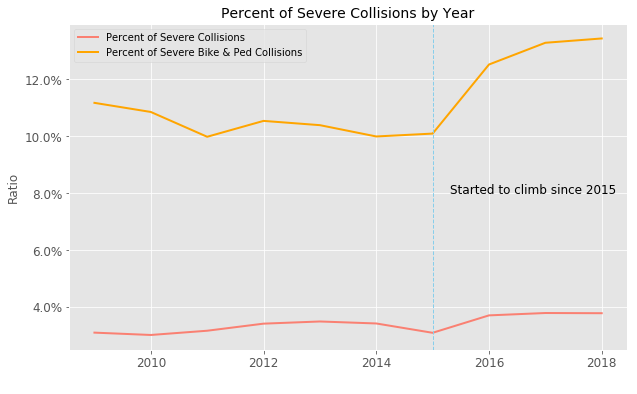

In [42]:
# Percent of Severe Collisions (All vs Bike/Ped)
ax = col_compare[['Percent of Severe Collisions', 'Percent of Severe Bike & Ped Collisions']].plot(color=['salmon', 'orange'], figsize=(10, 6), linewidth=2)

ax.set_title('Percent of Severe Collisions by Year', fontsize=14)
ax.set_xlabel(' ')
ax.set_ylabel('Ratio')
#ax.set_ylim([0, 0.04])

fmt = '{x:,.1%}'
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
    
ax.axvline(2015, color='skyblue', linestyle='dashed', linewidth=1)
ax.text(2015.3, 0.08, 'Started to climb since 2015', fontsize=12)

# plt.savefig('Percent of Severe Collisions by Year.png')

pass

### Collisions by Day of week (10-yr)

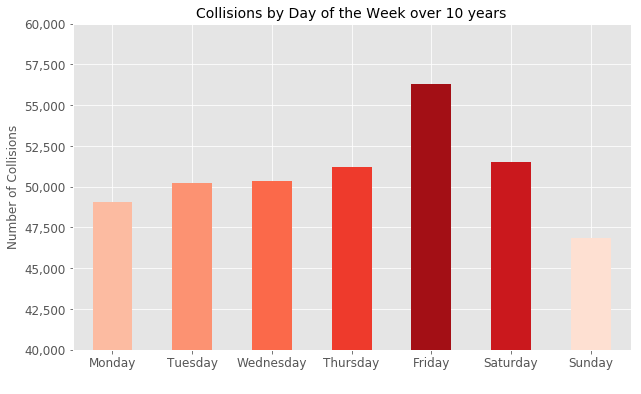

In [43]:
# Number of collisions by day of week Series
collision_dow = pd.Series(df.groupby('day_of_week').count()['case_id'])
collision_dow = collision_dow.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Set the colors
pal = sns.color_palette("Reds", 7) # define color platte
colordict = {'Friday': pal[6],
             'Saturday': pal[5],
             'Thursday': pal[4],
             'Wednesday': pal[3],
             'Tuesday': pal[2],
             'Sunday': pal[0],
             'Monday': pal[1]}

# Number of collisions by day of week chart
ax = collision_dow.plot(figsize=(10, 6), kind='bar', color=[colordict[i] for i in collision_dow.index], width=0.5, rot=0)

ax.set_title('Collisions by Day of the Week over 10 years', fontsize=14)
ax.set_ylim((40000, 60000))
ax.set_ylabel('Number of Collisions')
ax.set_xlabel(' ')

fmt = '{x:,.0f}'
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

# plt.savefig('Collisions by Day of Week.png')

pass

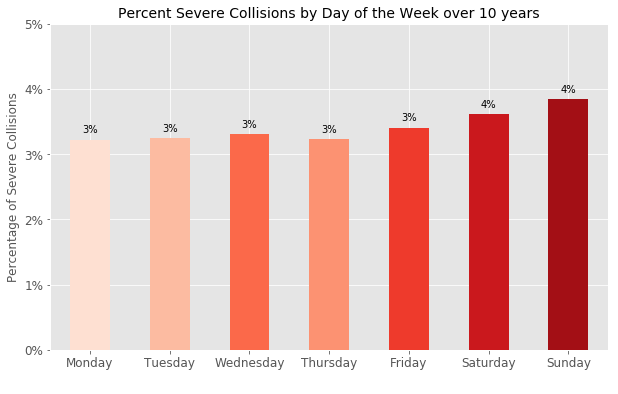

In [44]:
severe_collision_dow = pd.Series(df.groupby('day_of_week')['collision_severity'].agg(lambda x: ((x == 'Injury level 3: Severe') | (x == 'Injury level 4: Fatal')).mean()))
severe_collision_dow = severe_collision_dow.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

pal = sns.color_palette("Reds", 7) # define color platte
colordict = {'Friday': pal[4],
             'Saturday': pal[5],
             'Thursday': pal[2],
             'Wednesday': pal[3],
             'Tuesday': pal[1],
             'Sunday': pal[6],
             'Monday': pal[0]}

ax = severe_collision_dow.plot(figsize=(10, 6), kind='bar', color=[colordict[i] for i in severe_collision_dow.index], width=0.5, rot=0)

ax.set_title('Percent Severe Collisions by Day of the Week over 10 years', fontsize=14)
ax.set_ylabel('Percentage of Severe Collisions')
plt.ylim([0, 0.05])
ax.set_xlabel(' ')

fmt = '{x:,.0%}'
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
    
    
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 5
    va = 'bottom'
    label = '{:.0%}'.format(y_value)
    ax.annotate(label,
                 (x_value, y_value),
                 xytext=(0, space),
                 textcoords='offset points',
                 ha='center',
                 va=va)
    
# plt.savefig('Percent Severe Collisions by Day of Week.png')

pass

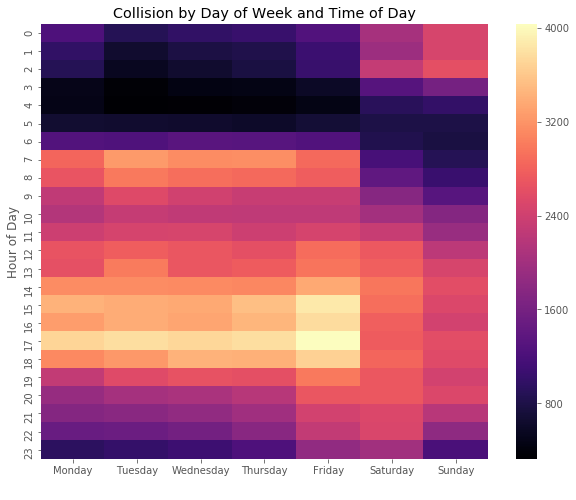

In [45]:
col_dow_hod = df.groupby(['hour_of_day', 'day_of_week'])['case_id'].count().unstack()
col_dow_hod = col_dow_hod[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

fig = plt.figure(figsize=(10,8))
sns.heatmap(col_dow_hod, cmap='magma')

plt.title('Collision by Day of Week and Time of Day')
plt.xlabel(' ')
plt.ylabel('Hour of Day')

# plt.savefig('Collision by Day of Week and Time of Day Heatmap.png')

pass

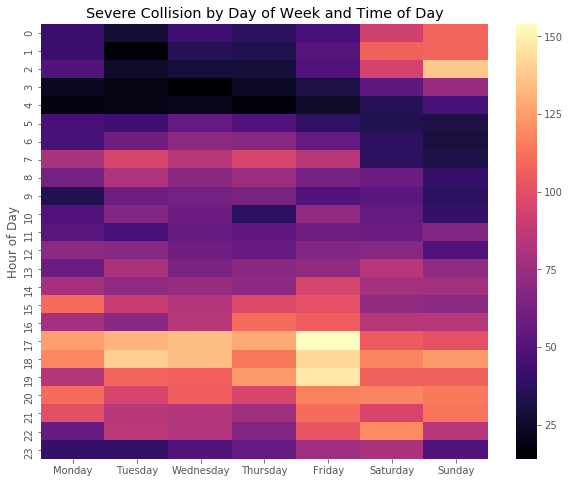

In [46]:
col_dow_hod_fatal = df[(df['collision_severity'] == 'Injury level 4: Fatal') | (df['collision_severity'] == 'Injury level 3: Severe')].groupby(['hour_of_day', 'day_of_week'])['case_id'].count().unstack()
col_dow_hod_fatal = col_dow_hod_fatal[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

fig = plt.figure(figsize=(10,8))
sns.heatmap(col_dow_hod_fatal, cmap='magma')

plt.title('Severe Collision by Day of Week and Time of Day')
plt.xlabel(' ')
plt.ylabel('Hour of Day')

# plt.savefig('Severe Collision by Day of Week and Time of Day Heatmap.png')

pass



### Collision by time period

In [47]:
col_injury_fatal_tp = df.groupby('time_period')['collision_severity'].agg([('All Collisions', len),
                                                                          ('Severe Collisions', lambda x: ((x == 'Injury level 3: Severe') | (x == 'Injury level 4: Fatal')).sum()),
                                                                          ('Percent of Severe Collisions', lambda x: ((x == 'Injury level 3: Severe') | (x == 'Injury level 4: Fatal')).mean())])

col_injury_fatal_tp

,All Collisions,Severe Collisions,Percent of Severe Collisions
time_period,,,
Early Morning,41596,1927,0.046327
AM Peak,49313,1484,0.030093
Midday,77129,1910,0.024764
PM Peak,102543,3094,0.030173
Evening,82185,3668,0.044631


In [48]:
# Get collision rate (by hour) by time period 
rcol_injury_fatal_tp = col_injury_fatal_tp.iloc[:, 0:2].copy()
rcol_injury_fatal_tp.iloc[0, 0:2] = col_injury_fatal_tp.iloc[0, 0:2] / 6
rcol_injury_fatal_tp.iloc[1, 0:2] = col_injury_fatal_tp.iloc[1, 0:2] / 3.5
rcol_injury_fatal_tp.iloc[2, 0:2] = col_injury_fatal_tp.iloc[2, 0:2] / 4.5
rcol_injury_fatal_tp.iloc[3, 0:2] = col_injury_fatal_tp.iloc[3, 0:2] / 4.5
rcol_injury_fatal_tp.iloc[4, 0:2] = col_injury_fatal_tp.iloc[4, 0:2] / 5.5
rcol_injury_fatal_tp

,All Collisions,Severe Collisions
time_period,,
Early Morning,6932.666667,321.166667
AM Peak,14089.428571,424.000000
Midday,17139.777778,424.444444
PM Peak,22787.333333,687.555556
Evening,14942.727273,666.909091


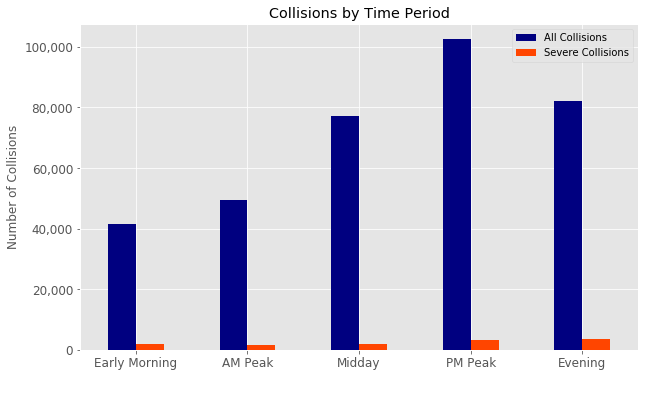

In [49]:
# Collisions by Time Period
ax = col_injury_fatal_tp[['All Collisions', 'Severe Collisions']].plot(kind='bar', figsize=(10, 6), rot=0, color=['navy', 'orangered'])
ax.set_xlabel(' ')
ax.set_ylabel('Number of Collisions')
ax.set_title('Collisions by Time Period')

fmt = '{x:,.0f}'
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)
    
# plt.savefig('Collisions by Time Period.png')

pass

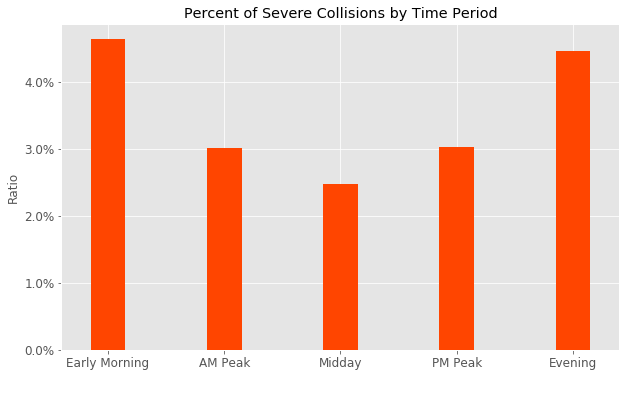

In [50]:
# Percent of Severe Collisions by Time Period

ax = col_injury_fatal_tp[['Percent of Severe Collisions']].plot(kind='bar', figsize=(10, 6), width=0.3, color='orangered', legend=None, rot=0)
ax.set_xlabel(' ')
ax.set_ylabel('Ratio')
ax.set_title('Percent of Severe Collisions by Time Period')

fmt = '{x:,.1%}'
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

# plt.savefig('Percent of Severe Collisions by Time Period.png')

pass

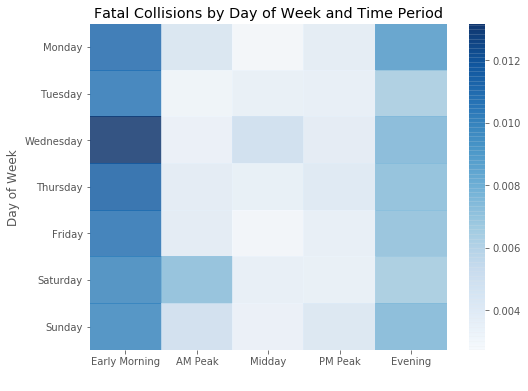

In [51]:
# Fatal Collision Heatmap by day of week and time period
############  FATAL COLLISION ONLY  ###########
col_injury_fatal_dow_tp = df.groupby(['day_of_week', 'time_period'])['collision_severity'].agg(lambda x: ((x == 'Injury level 4: Fatal')).mean()).unstack()
col_injury_fatal_dow_tp = col_injury_fatal_dow_tp.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize = (8,6))
sns.heatmap(col_injury_fatal_dow_tp, cmap='Blues', alpha=0.8)
plt.title('Fatal Collisions by Day of Week and Time Period')
plt.xlabel(' ')
plt.ylabel('Day of Week')

# plt.savefig('Fatal Collisions by Day of Week and Time Period.png')

pass

### Collision by type

In [52]:
table_cbt = df.groupby(['accident_year', 'type_of_collision'])['case_id'].count().unstack()

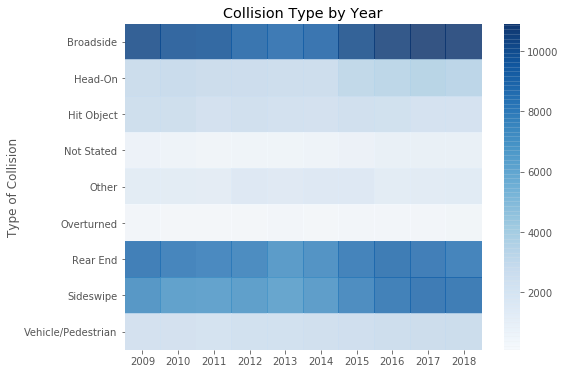

In [53]:
# Create Heat Map
plt.figure(figsize = (8,6))
sns.heatmap(table_cbt.T, cmap='Blues', alpha=0.8)
plt.title('Collision Type by Year')
plt.xlabel(' ')
plt.ylabel('Type of Collision')

# plt.savefig('Collision Type Heatmap by Year.png')

pass

In [54]:
df.groupby(['type_of_collision', 'collision_severity'])['collision_severity'].count().unstack()

collision_severity,Injury level 1: Complaint of Pain,Injury level 2: Other Visible,Injury level 3: Severe,Injury level 4: Fatal,Property Damage Only
type_of_collision,,,,,
Broadside,50537,25483,3144,443,20026
Head-On,11794,7709,1234,144,9199
Hit Object,3085,3574,624,205,16207
Not Stated,1996,1045,166,16,2130
Other,3502,3536,497,81,5643
Overturned,380,712,78,18,307
Rear End,37467,8296,750,88,35190
Sideswipe,16088,7232,757,68,51448
Vehicle/Pedestrian,11083,9335,2967,822,382


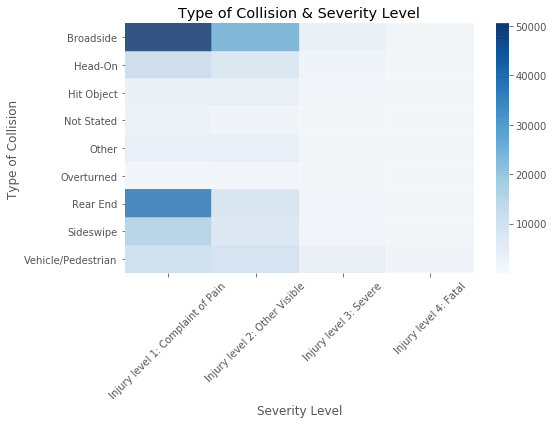

In [55]:
# Type of Collision & Severity Level    
### Hongsuk: How about let's exclude PROPERTY DAMAGE ONLY so that collisions resulted in injuries or death show up?  ########
plt.figure(figsize = (8,6))

sns.heatmap(df.groupby(['type_of_collision', 'collision_severity'])['collision_severity'].count().unstack().drop(['Property Damage Only'], axis=1), cmap='Blues', alpha=0.8)
#sns.heatmap(df.groupby(['type_of_collision', 'collision_severity'])['collision_severity'].count().unstack().drop(['Property Damage Only', 'Injury level 1: Complaint of Pain', 'Injury level 2: Other Visible'], axis=1), cmap='Blues', alpha=0.8)
plt.title('Type of Collision & Severity Level')
plt.xlabel('Severity Level')
plt.ylabel('Type of Collision')
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig('Collision Type Heatmap by Severity Level.png')

pass

### Collisions by violation category

In [56]:
table_cbvc = df.groupby(['accident_year', 'pcf_viol_category'])['case_id'].count().unstack()
table_cbvc

pcf_viol_category,Automobile Right of Way,Brakes,Driving or Bicycling Under the Influence of Alcohol or Drug,Fell Asleep,Following Too Closely,Hazardous Parking,Impeding Traffic,Improper Passing,Improper Turning,Lights,...,Other Improper Driving,Other Than Driver (or Pedestrian),Pedestrian Right of Way,Pedestrian Violation,Traffic Signals and Signs,Unknown,Unsafe Lane Change,Unsafe Speed,Unsafe Starting or Backing,Wrong Side of Road
accident_year,,,,,,,,,,,,,,,,,,,,,
2009,7034.0,3.0,2563.0,NaN,1713.0,38.0,12.0,426.0,1987.0,1.0,...,709.0,407.0,957.0,864.0,2817.0,1058.0,1813.0,8755.0,1751.0,1414.0
2010,6956.0,7.0,2348.0,NaN,1633.0,27.0,10.0,388.0,1854.0,1.0,...,515.0,441.0,1009.0,803.0,2666.0,1039.0,1688.0,8590.0,1763.0,1380.0
2011,6693.0,5.0,2446.0,NaN,1592.0,16.0,15.0,442.0,2011.0,4.0,...,423.0,388.0,1021.0,760.0,2573.0,788.0,1807.0,7932.0,1725.0,1404.0
2012,6328.0,5.0,2386.0,2.0,1621.0,34.0,11.0,414.0,2271.0,1.0,...,451.0,419.0,1026.0,831.0,2576.0,698.0,1803.0,7946.0,1722.0,1461.0
2013,6151.0,3.0,2291.0,2.0,1363.0,26.0,17.0,429.0,2535.0,2.0,...,403.0,472.0,1037.0,862.0,2419.0,586.0,1541.0,7407.0,1544.0,1291.0
2014,6475.0,6.0,2395.0,NaN,1401.0,37.0,6.0,378.0,2849.0,1.0,...,343.0,419.0,1129.0,899.0,2571.0,407.0,1678.0,7619.0,1645.0,1137.0
2015,7306.0,2.0,2452.0,NaN,1674.0,42.0,17.0,486.0,3475.0,5.0,...,469.0,392.0,1205.0,967.0,3000.0,1294.0,1898.0,8719.0,1748.0,1200.0
2016,7720.0,6.0,2474.0,NaN,1554.0,70.0,20.0,527.0,3678.0,2.0,...,449.0,414.0,1256.0,898.0,3022.0,1229.0,2016.0,9440.0,1787.0,1304.0
2017,7786.0,8.0,2151.0,1.0,1643.0,71.0,18.0,540.0,4068.0,4.0,...,449.0,403.0,1307.0,1041.0,3331.0,1439.0,1898.0,9049.0,1902.0,1346.0


In [57]:
# Find top 10 violation category over 10 years
df.groupby('pcf_viol_category').count()['case_id'].sort_values(ascending=False).head(10)

pcf_viol_category
Unsafe Speed                                                   84009
Automobile Right of Way                                        70304
Improper Turning                                               29147
Traffic Signals and Signs                                      28234
Driving or Bicycling Under the Influence of Alcohol or Drug    23525
Unsafe Lane Change                                             18052
Unsafe Starting or Backing                                     17406
Following Too Closely                                          15919
Wrong Side of Road                                             13199
Pedestrian Right of Way                                        11345
Name: case_id, dtype: int64

/Users/Chenlin/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


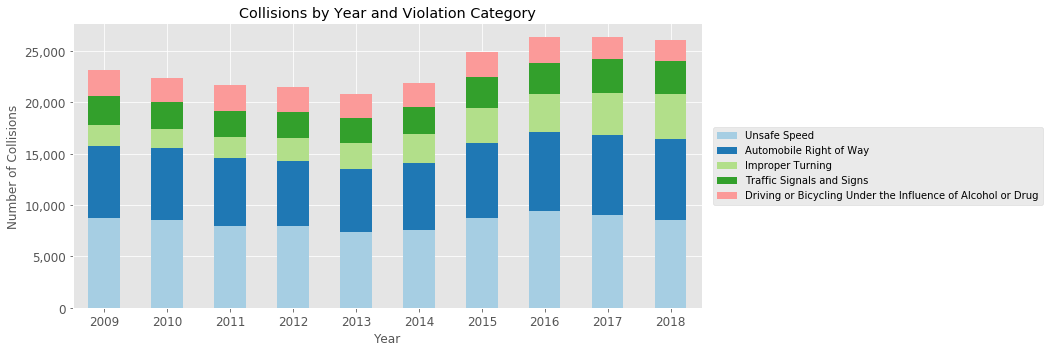

In [58]:
# Set colormap
pal = sns.color_palette("Paired", 9)

# Plot for top 5 violation category
ax = table_cbvc.plot.bar(stacked=True, figsize=(10,5), color = pal, 
                    y=['Unsafe Speed', 'Automobile Right of Way', 'Improper Turning', 'Traffic Signals and Signs', 
                      'Driving or Bicycling Under the Influence of Alcohol or Drug'], rot=0)

ax.set_title('Collisions by Year and Violation Category')
ax.set_ylabel('Number of Collisions')
ax.set_xlabel('Year')
plt.legend(bbox_to_anchor = (1.01, 0.5), loc = 'center left')

fmt = '{x:,.0f}'
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

plt.tight_layout()
# plt.savefig('Collisions by Year and Violation Category.png')

pass

### Most dangerous locations in the city

#### 1.1 Location Type: General

In [59]:
table_location = df.groupby(['accident_year', 'location_type'])['case_id'].count().unstack()
table_location

location_type,Highway,Intersection,Ramp
accident_year,,,
2009,272,129,425
2010,240,126,413
2011,278,163,417
2012,284,150,408
2013,290,186,432
2014,222,152,382
2015,270,202,473
2016,279,200,514
2017,254,145,490


In [60]:
table_severity = df.groupby(['accident_year', 'collision_severity'])['case_id'].count().unstack()
table_severity

collision_severity,Injury level 1: Complaint of Pain,Injury level 2: Other Visible,Injury level 3: Severe,Injury level 4: Fatal,Property Damage Only
accident_year,,,,,
2009,13408,6379,942,167,14926
2010,12864,6010,865,173,14534
2011,12538,6032,904,153,13795
2012,12944,6174,961,184,13299
2013,12392,6427,925,189,12004
2014,12464,6819,942,191,12732
2015,14059,7390,967,175,14370
2016,14975,7196,1183,242,14891
2017,15096,7389,1258,222,15129


In [61]:
table_lt_cs = df.groupby(['location_type', 'collision_severity'])['case_id'].count().unstack()
table_lt_cs

collision_severity,Injury level 1: Complaint of Pain,Injury level 2: Other Visible,Injury level 3: Severe,Injury level 4: Fatal,Property Damage Only
location_type,,,,,
Highway,1090,460,121,30,856
Intersection,720,385,82,13,353
Ramp,1936,848,101,16,1431


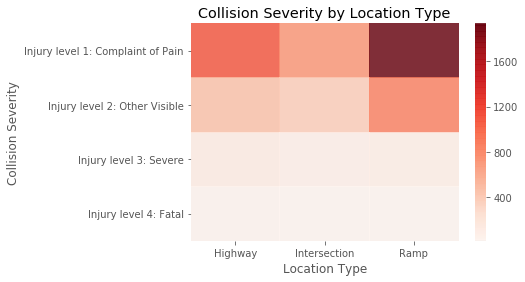

In [62]:
# Exclude property damage
plt.figure(figsize = (6,4))
sns.heatmap(table_lt_cs.drop(['Property Damage Only'], axis=1).T, cmap='Reds', alpha=0.8)
plt.title('Collision Severity by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Collision Severity')
plt.yticks(rotation=0)
# plt.savefig('Collision Severity by Location Type.png')

pass

#### 1.2 Location Type: Bike & Ped

In [63]:
# Bike
table_bike = df[df['bicycle_accident'] == 'Y']
table_b = table_bike.groupby(['location_type', 'collision_severity'])['case_id'].count().unstack()
table_b

collision_severity,Injury level 1: Complaint of Pain,Injury level 2: Other Visible,Injury level 3: Severe,Injury level 4: Fatal,Property Damage Only
location_type,,,,,
Highway,36.0,58.0,14.0,NaN,4.0
Intersection,55.0,50.0,5.0,1.0,5.0
Ramp,124.0,103.0,9.0,1.0,6.0


In [64]:
# Ped
table_ped = df[df['pedestrian_accident'] == 'Y']
table_p = table_ped.groupby(['location_type', 'collision_severity'])['case_id'].count().unstack()
table_p

collision_severity,Injury level 1: Complaint of Pain,Injury level 2: Other Visible,Injury level 3: Severe,Injury level 4: Fatal,Property Damage Only
location_type,,,,,
Highway,30,55,32,16,4
Intersection,53,47,13,4,4
Ramp,91,51,22,5,2


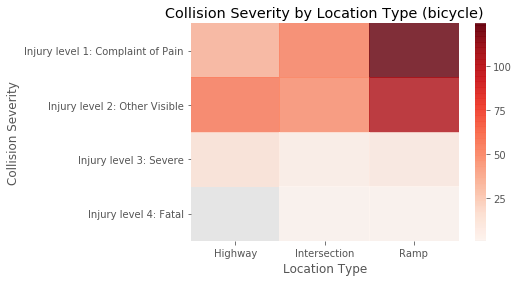

In [65]:
plt.figure(figsize = (6,4))
sns.heatmap(table_b.drop(['Property Damage Only'], axis=1).T, cmap='Reds', alpha=0.8)
plt.title('Collision Severity by Location Type (bicycle)')
plt.xlabel('Location Type')
plt.ylabel('Collision Severity')
# plt.savefig('Collision Severity by Location Type (bicycle).png')
pass

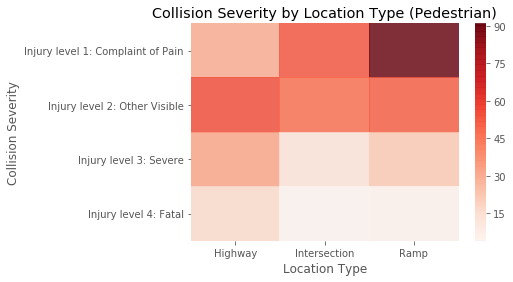

In [66]:
plt.figure(figsize = (6,4))
sns.heatmap(table_p.drop(['Property Damage Only'], axis=1).T, cmap='Reds', alpha=0.8)
plt.title('Collision Severity by Location Type (Pedestrian)')
plt.xlabel('Location Type')
plt.ylabel('Collision Severity')
# plt.savefig('Collision Severity by Location Type (Pedestrian).png')
pass

#### 2.1 Primary & Secondary Road: General

In [67]:
# Primary road
# table_pr = df.groupby(['primary_rd', 'collision_severity'])['case_id'].count().unstack()
# table_pr['Injury level 4: Fatal'].sort_values(ascending=False).head(10).to_frame()

In [68]:
# table_pr['Injury level 3: Severe'].sort_values(ascending=False).head(10).to_frame()

In [69]:
# We can know which primary+secondary road had most accidents regardless of severity.
table_road = df.set_index(['primary_rd', 'secondary_rd'], inplace=False)
table_road = table_road.groupby(level=['primary_rd','secondary_rd']).size().sort_values(ascending=False).to_frame().rename(columns={0: 'Count'}).head(10)
table_road.index.names = ['Primary Road', 'Secondary Road']
table_road

,,Count
Primary Road,Secondary Road,
BURBANK BL,SEPULVEDA BL,151
MANCHESTER AV,FIGUEROA ST,151
HIGHLAND AV,FRANKLIN AV,142
PACIFIC COAST HWY,SUNSET BL,134
ROSCOE BL,VAN NUYS BL,130
LA BREA AV,RODEO RD,129
TAMPA AV,NORDHOFF ST,125
CRENSHAW BL,ADAMS BL,123
SLAUSON AV,WESTERN AV,123


In [70]:
# Most dangerous location (primary + secondary) for fatal accident
table_fatal = df[df['collision_severity'] == 'Injury level 4: Fatal']
table_road_fatal = table_fatal.set_index(['primary_rd', 'secondary_rd'], inplace=False)
table_road_fatal = table_road_fatal.groupby(level=['primary_rd','secondary_rd']).size().sort_values(ascending=False).to_frame().rename(columns={0: 'Count'}).head(10)
table_road_fatal.index.names = ['Primary Road', 'Secondary Road']
table_road_fatal


,,Count
Primary Road,Secondary Road,
WESTERN AV,79TH ST,4
PACIFIC COAST HWY,TEMESCAL CANYON RD,4
MANCHESTER AV,NORMANDIE AV,3
OLYMPIC BL,ORME AV,3
LINCOLN BL,83RD ST,3
OSBORNE ST,DRONFIELD AV,3
SEPULVEDA BL,PARTHENIA ST,3
PARTHENIA ST,LOUISE AV,3
SUNSET BL,MALTMAN AV,3


In [71]:
# Most dangerous location (primary + secondary) for severe accident
table_severe = df[df['collision_severity'] == 'Injury level 3: Severe']
table_road_severe = table_severe.set_index(['primary_rd', 'secondary_rd'], inplace=False)
table_road_severe = table_road_severe.groupby(level=['primary_rd','secondary_rd']).size().sort_values(ascending=False).to_frame().rename(columns={0: 'Count'}).head(10)
table_road_severe.index.names = ['Primary Road', 'Secondary Road']
table_road_severe


Count
Primary Road      Secondary Road           
SEPULVEDA BL      NORDHOFF ST             9
FOOTHILL BL       BALBOA BL               9
VISTA DEL MAR     IMPERIAL HWY            9
GAFFEY ST         WESTMONT DR             8
RESEDA BL         ROSCOE BL               8
PACIFIC COAST HWY FIGUEROA PL             8
                  TEMESCAL CANYON RD      7
LA BREA AV        ADAMS BL                7
NORDHOFF ST       WOODLEY AV              6
LA BREA AV        RODEO RD                6

#### Primary & Secondary Road: Bike & Ped

In [72]:
# Most dangerous location (primary + secondary) for fatal accident
# Bike
# table_ps_b = table_bike[table_bike['collision_severity'] == 'Injury level 4: Fatal']
# table_ps_b_fatal = table_ps_b.set_index(['primary_rd', 'secondary_rd'], inplace=False)
# table_ps_b_fatal.groupby(level=['primary_rd','secondary_rd']).size().sort_values(ascending=False).to_frame().rename(columns={0: 'Count'}).head(10)


In [73]:
# Most dangerous location (primary + secondary) for fatal accident
# Ped
table_ps_p = table_ped[table_ped['collision_severity'] == 'Injury level 4: Fatal']
table_ps_p_fatal = table_ps_p.set_index(['primary_rd', 'secondary_rd'], inplace=False)
table_ps_p_fatal = table_ps_p_fatal.groupby(level=['primary_rd','secondary_rd']).size().sort_values(ascending=False).to_frame().rename(columns={0: 'Count'}).head(10)
table_ps_p_fatal.index.names = ['Primary Road', 'Secondary Road']
table_ps_p_fatal


Count
Primary Road Secondary Road            
WESTERN AV   79TH ST                  4
CULVER BL    SLAUSON AV               3
OLYMPIC BL   ORME AV                  3
SEPULVEDA BL PARTHENIA ST             3
CRENSHAW BL  63RD ST                  2
HOLLYWOOD BL GRAMERCY PL              2
AVALON BL    80TH ST                  2
VICTORY BL   COLDWATER CANYON AV      2
             PLATT AV                 2
PICO BL      BEDFORD ST               2

In [74]:
# Most dangerous location (primary + secondary) for severe accident
# Bike
# table_ps_b2 = table_bike[table_bike['collision_severity'] == 'Injury level 3: Severe']
# table_ps_b_severe = table_ps_b2.set_index(['primary_rd', 'secondary_rd'], inplace=False)
# table_ps_b_severe.groupby(level=['primary_rd','secondary_rd']).size().sort_values(ascending=False).to_frame().rename(columns={0: 'Count'}).head(10)


In [75]:
# Most dangerous location (primary + secondary) for severe accident
# Ped
table_ps_p2 = table_ped[table_ped['collision_severity'] == 'Injury level 3: Severe']
table_ps_p_severe = table_ps_p2.set_index(['primary_rd', 'secondary_rd'], inplace=False)
table_ps_p_severe = table_ps_p_severe.groupby(level=['primary_rd','secondary_rd']).size().sort_values(ascending=False).to_frame().rename(columns={0: 'Count'}).head(10)
table_ps_p_severe.index.names = ['Primary Road', 'Secondary Road']
table_ps_p_severe

Count
Primary Road      Secondary Road       
HIGHLAND AV       HOLLYWOOD BL        5
PACIFIC COAST HWY FIGUEROA PL         5
LA BREA AV        ADAMS BL            4
                  WASHINGTON BL       4
WESTERN AV        5TH ST              4
CENTRAL AV        89TH ST             4
PACIFIC COAST HWY FRIES AV            4
BALBOA BL         ROSCOE BL           4
SUNSET BL         FOUNTAIN AV         4
WHITE OAK AV      VENTURA BL          3

### Focus point 1: How does the following correlate to total collisions or severity of collision?

#### 1. Weather

In [76]:
table_weather = df.groupby(['accident_year', 'weather_1'])['case_id'].count().unstack()
table_weather = table_weather.sum().to_frame()
table_weather = table_weather.T
table_weather['Rate of accident under harsh weather condition'] = (table_weather['Fog'] + table_weather['Raining'] + table_weather['Snowing'])/table_weather.sum(axis=1)
table_weather = table_weather['Rate of accident under harsh weather condition'].to_frame()
table_weather

,Rate of accident under harsh weather condition
0,0.030704


In [77]:
table_weather_fatal = table_fatal.groupby(['accident_year', 'weather_1'])['case_id'].count().unstack()
table_weather_fatal.fillna(0, inplace=True)
table_weather_fatal = table_weather_fatal.sum().to_frame()
table_weather_fatal = table_weather_fatal.T
table_weather_fatal['Rate of accident under harsh weather condition'] = (table_weather_fatal['Fog'] + table_weather_fatal['Raining'])/table_weather_fatal.sum(axis=1)
table_weather_fatal = table_weather_fatal['Rate of accident under harsh weather condition'].to_frame()
table_weather_fatal

,Rate of accident under harsh weather condition
0,0.030769


In [78]:
table_weather_severe = table_severe.groupby(['accident_year', 'weather_1'])['case_id'].count().unstack()
table_weather_severe.fillna(0, inplace=True)
table_weather_severe = table_weather_severe.sum().to_frame()
table_weather_severe = table_weather_severe.T
table_weather_severe['Rate of accident under harsh weather condition'] = (table_weather_severe['Fog'] + table_weather_severe['Raining'])/table_weather_severe.sum(axis=1)
table_weather_severe = table_weather_severe['Rate of accident under harsh weather condition'].to_frame()
table_weather_severe

,Rate of accident under harsh weather condition
0,0.026818


#### 2.1 Road Surface

In [79]:
table_road = df.groupby(['accident_year', 'road_surface'])['case_id'].count().unstack()
table_road = table_road.sum().to_frame()
table_road = table_road.T
table_road['Rate of accident under bad road surface'] = (table_road.sum(axis=1) - table_road['Dry'])/table_road.sum(axis=1)
table_road = table_road['Rate of accident under bad road surface'].to_frame()
table_road

,Rate of accident under bad road surface
0,0.061524


In [80]:
table_road_fatal = table_fatal.groupby(['accident_year', 'road_surface'])['case_id'].count().unstack()
table_road_fatal = table_road_fatal.sum().to_frame()
table_road_fatal = table_road_fatal.T
table_road_fatal['Rate of accident under bad road surface'] = (table_road_fatal.sum(axis=1) - table_road_fatal['Dry'])/table_road_fatal.sum(axis=1)
table_road_fatal = table_road_fatal['Rate of accident under bad road surface'].to_frame()
table_road_fatal

,Rate of accident under bad road surface
0,0.064721


In [81]:
table_road_severe = table_severe.groupby(['accident_year', 'road_surface'])['case_id'].count().unstack()
table_road_severe = table_road_severe.sum().to_frame()
table_road_severe = table_road_severe.T
table_road_severe['Rate of accident under bad road condition'] = (table_road_severe.sum(axis=1) - table_road_severe['Dry'])/table_road_severe.sum(axis=1)
table_road_severe = table_road_severe['Rate of accident under bad road condition'].to_frame()
table_road_severe

,Rate of accident under bad road condition
0,0.053538


#### 2.2 Road Condition

In [82]:
table_road_cond = df.groupby(['accident_year', 'road_cond_1'])['case_id'].count().unstack()
table_road_cond = table_road_cond.sum().to_frame()
table_road_cond = table_road_cond.T
table_road_cond['Rate of accident under bad road condition'] = (table_road_cond.sum(axis=1) - table_road_cond['No Unusual Condition'])/table_road_cond.sum(axis=1)
table_road_cond = table_road_cond['Rate of accident under bad road condition'].to_frame()
table_road_cond

,Rate of accident under bad road condition
0,0.031273


In [83]:
table_road_cond_fatal = table_fatal.groupby(['accident_year', 'road_cond_1'])['case_id'].count().unstack()
table_road_cond_fatal = table_road_cond_fatal.sum().to_frame()
table_road_cond_fatal = table_road_cond_fatal.T
table_road_cond_fatal['Rate of accident under bad road condition'] = (table_road_cond_fatal.sum(axis=1) - table_road_cond_fatal['No Unusual Condition'])/table_road_cond_fatal.sum(axis=1)
table_road_cond_fatal = table_road_cond_fatal['Rate of accident under bad road condition'].to_frame()
table_road_cond_fatal

,Rate of accident under bad road condition
0,0.025464


In [84]:
table_road_cond_severe = table_severe.groupby(['accident_year', 'road_cond_1'])['case_id'].count().unstack()
table_road_cond_severe = table_road_cond_severe.sum().to_frame()
table_road_cond_severe = table_road_cond_severe.T
table_road_cond_severe['Rate of accident under bad road condition'] = (table_road_cond_severe.sum(axis=1) - table_road_cond_severe['No Unusual Condition'])/table_road_cond_severe.sum(axis=1)
table_road_cond_severe = table_road_cond_severe['Rate of accident under bad road condition'].to_frame()
table_road_cond_severe

,Rate of accident under bad road condition
0,0.034159


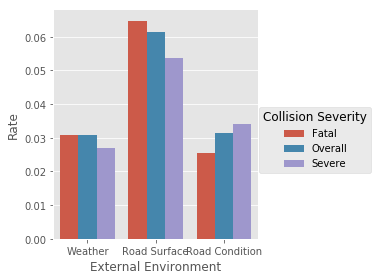

In [85]:
combined_table = pd.DataFrame(data={'External Environment': ['Weather', 'Road Surface', 'Road Condition'], 
                                    'Overall': [0.030704, 0.061524, 0.031273],
                                    'Fatal': [0.030769, 0.064721, 0.025464],
                                    'Severe': [0.026818, 0.053538, 0.034159]})
combined_table_melt = pd.melt(combined_table, id_vars = 'External Environment', var_name='Collision Severity', value_name='Rate')

fig = plt.figure()
sns.factorplot(x = 'External Environment', y='Rate', hue='Collision Severity', data=combined_table_melt, kind='bar')
plt.show()
# plt.savefig('Rate of collisions caused by External Environment.png')
pass

### Focus point 2 - Does alcohol use drive accidents?
Let's look for a relationship between alcohol use and accidents. One theory is that more accidents happen on Friday because people are out drinking celebrating the end of the work week. 

The 'alcohol involved' column includes either Y or is blank. 

What percentage of accidents involve alcohol use? Look at alochol_involved as a percentage of total accidents.
by day of the week
by time zone
by severity of accident

A heat map showing time zone and day of the week might be insightful.

In [86]:
# confirming on values are Y and blank
df.alcohol_involved.unique()

array(['N', 'Y'], dtype=object)

In [87]:
alcohol_dow = df.groupby(['day_of_week', 'alcohol_involved'])['case_id'].count().unstack()
alcohol_dow = alcohol_dow.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
alcohol_dow.rename(columns={'Y': 'Alcohol Involved',
                             'N': 'None Reported',}, inplace=True)
alcohol_dow

alcohol_involved,None Reported,Alcohol Involved
day_of_week,,
Monday,45211,3843
Tuesday,46896,3326
Wednesday,46810,3532
Thursday,47233,4006
Friday,51001,5289
Saturday,44335,7158
Sunday,39199,7649


In [88]:
# already created up above
collision_dow

day_of_week
Monday       49054
Tuesday      50222
Wednesday    50342
Thursday     51239
Friday       56290
Saturday     51493
Sunday       46848
Name: case_id, dtype: int64

In [89]:
# now merge these series and create a % alcohol involved calc

collision_dow_df = pd.DataFrame(collision_dow)
# type(collision_dow_df)
merged_alc = collision_dow_df.merge(alcohol_dow, left_index=True, right_index=True)
merged_alc

# alternate approach
# alcohol_dow.merge(collision_dow_df, on='day_of_week')

# calculate percentage of accidents involving alcohol
merged_alc['Percent Alcohol Involved'] = merged_alc['Alcohol Involved'] / merged_alc['case_id']
merged_alc

,case_id,None Reported,Alcohol Involved,Percent Alcohol Involved
day_of_week,,,,
Monday,49054,45211,3843,0.078342
Tuesday,50222,46896,3326,0.066226
Wednesday,50342,46810,3532,0.070160
Thursday,51239,47233,4006,0.078183
Friday,56290,51001,5289,0.093960
Saturday,51493,44335,7158,0.139009
Sunday,46848,39199,7649,0.163273


/Users/Chenlin/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


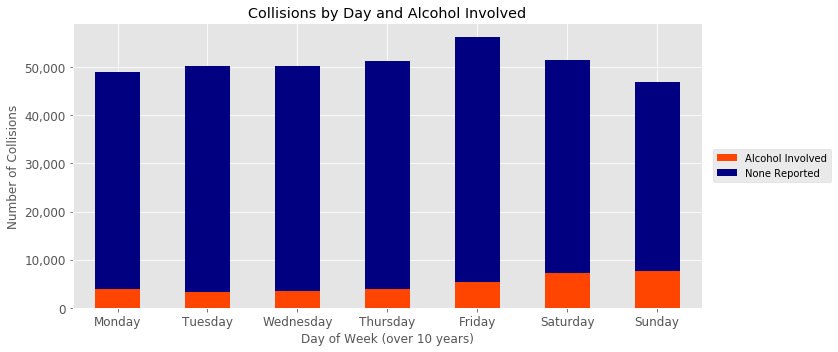

In [90]:
# Set colormap
pal = sns.color_palette("Paired", 9)

# Plot for alcohol involved by day
ax = alcohol_dow.plot.bar(stacked=True, figsize=(10,5), color = ['orangered', 'navy'], 
                    y=['Alcohol Involved', 'None Reported'], rot=0)

ax.set_title('Collisions by Day and Alcohol Involved')
ax.set_ylabel('Number of Collisions')
ax.set_xlabel('Day of Week (over 10 years)')
plt.legend(bbox_to_anchor = (1.01, 0.5), loc = 'center left')

fmt = '{x:,.0f}'
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)


plt.tight_layout()
# plt.savefig('Collisions_Day_and_Alcohol.png')
pass

We see that alcohol is involved on the weekends, particularly Saturday and Sunday, much more that during the rest of the week. This is kind of expected, right? But why is Sunday the biggest day for alcohol involved in accidents (by both absolute count and by percentage). Perhaps this has to do with time of day and how it is classified. After midnight on Saturday night is actually Sunday morning. Let's look at time of day bins as well. 

In [91]:
alcohol_only = df[(df.alcohol_involved == 'Y')]
alcohol_dow_tm_slice = alcohol_only.groupby(['day_of_week', 'time_period'])['case_id'].count().unstack()
alcohol_dow_tm_slice = alcohol_dow_tm_slice.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# JUST NOW alcohol_dow_tm_slice = df.groupby(['alcohol_involved', 'day_of_week', 'time_period'])['case_id'].count().unstack()
# simple copy-paste-edit failed here for ordering dow; figure this out
# alcohol_dow_tm_slice = alcohol_dow_tm_slice.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

alcohol_dow_tm_slice

time_period,Early Morning,AM Peak,Midday,PM Peak,Evening
day_of_week,,,,,
Monday,1193,205,330,718,1378
Tuesday,687,223,333,677,1387
Wednesday,828,228,329,694,1444
Thursday,912,202,343,763,1777
Friday,1318,219,375,878,2485
Saturday,2775,235,469,929,2728
Sunday,3219,311,444,1102,2543


If nothing else, it's less likely alcohol will be involved if the sun is up. 

In [92]:
alcohol_dow_tm_slice.T

day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
time_period,,,,,,,
Early Morning,1193,687,828,912,1318,2775,3219
AM Peak,205,223,228,202,219,235,311
Midday,330,333,329,343,375,469,444
PM Peak,718,677,694,763,878,929,1102
Evening,1378,1387,1444,1777,2485,2728,2543


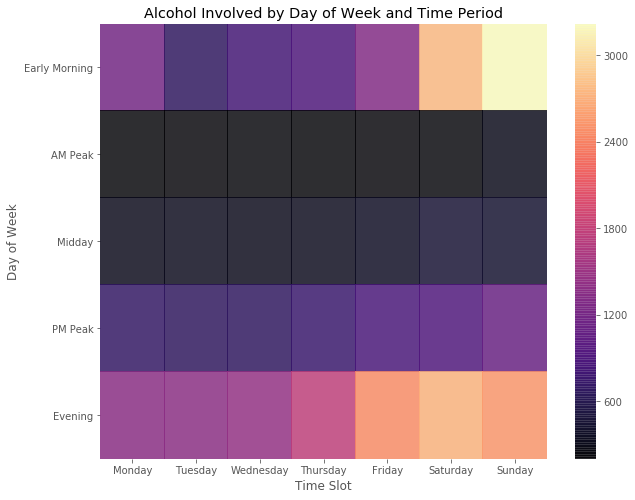

In [93]:
# Heatmap by day of week and time period with alcohol involved

plt.figure(figsize = (10,8))
sns.heatmap(alcohol_dow_tm_slice.T, cmap='magma', alpha=0.8)
plt.title('Alcohol Involved by Day of Week and Time Period')
plt.xlabel('Time Slot')
plt.ylabel('Day of Week')
plt.yticks(rotation=0)
plt.xticks(rotation=0)

# plt.savefig('Alcohol_Day_and_Time_Period_HeatMap.png')

pass

The heatmap above shows the ends of the day are when alcohol is more often involved in accidents, and that the weekends are the times alcohol involvement is most common. 

Are accidents involving alcohol more severe than others?

### Focus point 3: Victims

In [94]:
severe_victim = victim_df[(victim_df['victim_degree_of_injury'] == 'Killed') |\
                          (victim_df['victim_degree_of_injury'] == 'Severe Injury')]
fatal_victim = victim_df[(victim_df['victim_degree_of_injury'] == 'Killed')]

#### Victim Age Distribution

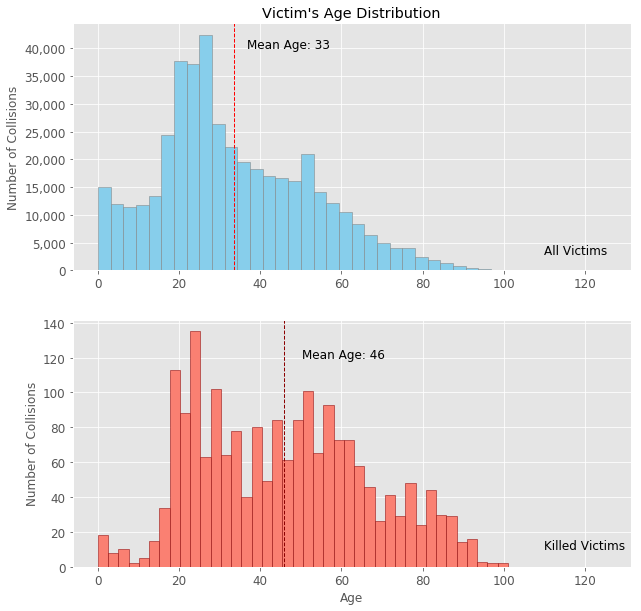

In [95]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(211)
ax1 = victim_df['victim_age'].hist(bins=40, color='skyblue', edgecolor='grey')
ax2 = fig.add_subplot(212, sharex=ax1)
ax2 = fatal_victim['victim_age'].hist(bins=40, color='salmon', edgecolor='darkred')

for ax in [ax1, ax2]:
    ax.set_ylabel('Number of Collisions')
    fmt = '{x:,.0f}'
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(12)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12)
        
ax1.set_title("Victim's Age Distribution")
ax1.axvline(victim_df['victim_age'].mean(), color='red', linestyle='dashed', linewidth=1)
ax1.text(victim_df['victim_age'].mean() + victim_df['victim_age'].mean()/10,
        40000, 'Mean Age: {:.0f}'.format(victim_df['victim_age'].mean()), fontsize=12)
ax1.text(110, 3000, 'All Victims', fontsize=12)

ax2.axvline(fatal_victim['victim_age'].mean(), color='darkred', linestyle='dashed', linewidth=1)
ax2.text(fatal_victim['victim_age'].mean() + fatal_victim['victim_age'].mean()/10,
        120, 'Mean Age: {:.0f}'.format(fatal_victim['victim_age'].mean()), fontsize=12)
ax2.text(110, 10, 'Killed Victims', fontsize=12)

ax2.set_xlabel('Age')

# plt.savefig('Victim Age Distribution.png')

pass

### Injury level and sex

In [96]:
# Victim by Sex
victim_df.groupby('victim_sex')['case_id'].count()

victim_sex
F    215769
M    223440
Name: case_id, dtype: int64

In [97]:
# Injury Level by Sex
victim_injury = pd.DataFrame(victim_df.groupby(['victim_sex', 'victim_degree_of_injury'])['case_id'].count().unstack(level=0))
victim_injury.drop(index=['Complaint of Pain', 'No Injury'], inplace=True)
victim_injury

victim_sex,F,M
victim_degree_of_injury,,
Killed,536,1440
Other Visible Injury,29513,46603
Severe Injury,3371,7600


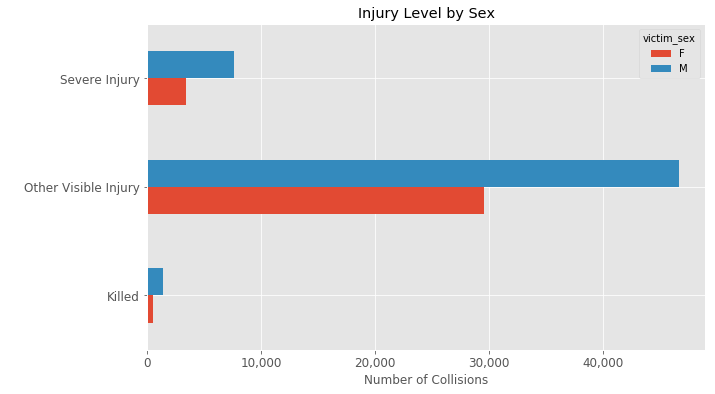

In [98]:
# Work in Progress
ax = victim_injury.plot(kind='barh', figsize=(10, 6))

ax.set_xlabel('Number of Collisions')
ax.set_ylabel(' ')
ax.set_title('Injury Level by Sex')

fmt = '{x:,.0f}'
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

### Race 

In [99]:
# Race & Severity Breakdown
race_severity = victim_party_df.groupby(['race', 'victim_degree_of_injury'])['victim_degree_of_injury'].agg('count').unstack()
race_severity.drop(index='Unknown', inplace=True)
race_severity

victim_degree_of_injury,Complaint of Pain,Killed,No Injury,Other Visible Injury,Severe Injury
race,,,,,
Asian,10008,64,5669,2975,304
Black,38203,355,17487,9507,1806
Hispanic,96560,814,64126,33441,4728
Other,22968,141,10139,6293,749
White,49575,508,23628,22324,3076


In [100]:
# Column-wise Percentage
race_severity_ratio = (100 * race_severity / race_severity.sum()).round(0)
race_severity_ratio

victim_degree_of_injury,Complaint of Pain,Killed,No Injury,Other Visible Injury,Severe Injury
race,,,,,
Asian,5.0,3.0,5.0,4.0,3.0
Black,18.0,19.0,14.0,13.0,17.0
Hispanic,44.0,43.0,53.0,45.0,44.0
Other,11.0,7.0,8.0,8.0,7.0
White,23.0,27.0,20.0,30.0,29.0


In [101]:
# Row-wise Percentage
race_severity_ratio2 = race_severity_ratio.apply(lambda x: x/x.sum(), axis=1)
race_severity_ratio2

victim_degree_of_injury,Complaint of Pain,Killed,No Injury,Other Visible Injury,Severe Injury
race,,,,,
Asian,0.250000,0.150000,0.250000,0.200000,0.150000
Black,0.222222,0.234568,0.172840,0.160494,0.209877
Hispanic,0.192140,0.187773,0.231441,0.196507,0.192140
Other,0.268293,0.170732,0.195122,0.195122,0.170732
White,0.178295,0.209302,0.155039,0.232558,0.224806


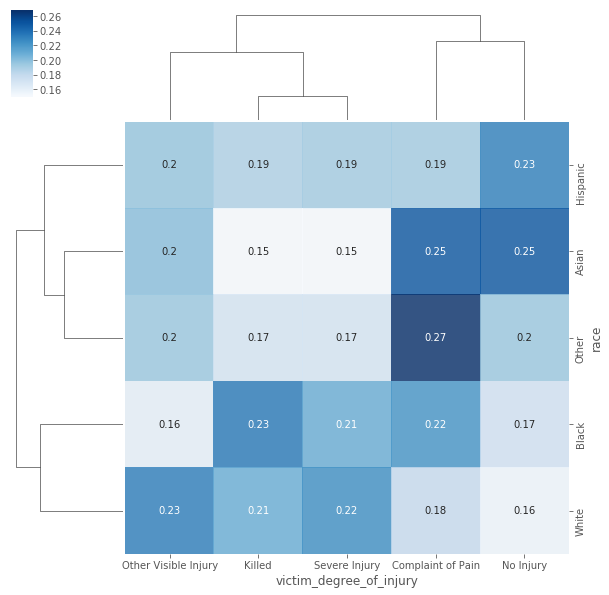

In [102]:
sns.clustermap(race_severity_ratio2, cmap='Blues', annot=True, alpha=0.8)



pass

### Vehicle Make (% fatal by Make)

In [103]:
vehiclemake_severity = victim_party_df.groupby('vehicle_make')['victim_degree_of_injury'].agg([('Number of Collisions Resulted in Injury', len),
                                                                        ('Percentage Fatal', lambda x: (x == 'Killed').mean())])
vehiclemake_severity.sort_values(by='Percentage Fatal', ascending=False).head(10)

,Number of Collisions Resulted in Injury,Percentage Fatal
vehicle_make,,
SPCNS (SPL CONSTRUCTED VEH),18,0.111111
FERRARI,22,0.090909
KTM,41,0.048780
WINNEBAGO,21,0.047619
DUCATI (MOTORCYCLE),373,0.040214
AMERICAN MOTORS (AMC),27,0.037037
YAMAHA,2097,0.030520
SUZUKI,2263,0.026513
OTHER - MOTORCYCLE,815,0.025767


In [104]:
vehiclemake_severity.sort_values(by='Percentage Fatal', ascending=True).head(10)

,Number of Collisions Resulted in Injury,Percentage Fatal
vehicle_make,,
ZASTAVA,2,0.0
MERCURY,1998,0.0
MCLAREN,2,0.0
MASERATI,128,0.0
MARMON HARRINGTON,1,0.0
MAICO,1,0.0
MACK,66,0.0
LOTUS,2,0.0
LINDE,1,0.0


### Focus point 4: Traffic count

In [105]:
table_count = df_count.set_index(['Primary Street', 'Cross Street'], inplace=False)
table_count['Total'].to_frame().dropna().sort_values(by='Total', ascending=False)

Total
Primary Street        Cross Street                          
HIGHLAND AV           LELAND WAY                     94756.0
SEPULVEDA BL          LINCOLN BL                     80189.0
                      LINCOLN BL                     77505.0
FOUNTAIN AV           HYPERION AV                    77442.0
CRENSHAW BL           9TH ST                         77294.0
VERMONT AV            28TH ST                        76859.0
LACONIA AV            HOOVER ST                      76117.0
WILSHIRE BL           SEPULVEDA BL                   74845.0
VERMONT AV            28TH ST                        74418.0
WILSHIRE BL           SEPULVEDA BL                   73924.0
PACIFIC COAST HWY     CHANNEL RD / CHAUTAUQUA BL     72601.0
PACIFIC CAST HWY      CHANNEL RD / CHAUTAUQUA BL     71637.0
VERMONT AV            28TH ST                        66832.0
MARTIN LUTHER KING BL MALL DRWY W/O CRENSHAW BL      66019.0
3RD ST                GRAND VIEW ST                  65913.0
LOS FELIZ BL          GRIFFITH PARK BL               65876.0
PACIFIC COAST HWY     SUNSET BL                      62995.0
                      SUNSET BL                      62367.0
SANTA MONICA BL       HIGHLAND AV                    62162.0
LA CIENEGA BL         CENTINELA AV                   61864.0
                      CENTINELA AV                   61802.0
LOS FELIZ BL          COMMONWEALTH AV                61782.0
ROSCOE BL             HASKELL AV                     59308.0
VAN NUYS BL           ALBERS ST                      59175.0
VICTORY BL            FIRMAMENT AV                   59075.0
STRATHERN ST          GOLL AV                        57873.0
LA CIENEGA BL         JEFFERSON BL                   57822.0
                      JEFFERSON BL                   57789.0
COLORADO BL           EAGLE VISTA DR / MT HELENA AV  57649.0
NORDHOFF ST           RESEDA BL                      57279.0
...                                                      ...
DELANO ST             VAN NUYS BL                      128.0
LOWRY RD              HOLBORO DR                       127.0
NORTH DRIVEWAY        533VERNON AV                     125.0
15TH ST               WEYMOUTH AV                      123.0
BYNNER DR             MALGREN AV                       118.0
DENISON AV            36TH ST                          115.0
170TH ST              FIGUEROA ST                      110.0
CESAR CHAVEZ AV       N BROADWAY                       108.0
MALAGA RD             OUTPOST DR                       106.0
GLEN IRIS AV          COLORADO BL                      106.0
EDENHURST AV          CHEVY CHASE DR                   103.0
                      CHEVY CHASE DR                   103.0
WOODCOCK AV           POLK ST                           94.0
65TH PL               VAN NESS AV                       86.0
76TH ST               WESTERN AV                        86.0
SLAUSON  AV           HARBOR FWY N/B RAMP               77.0
MALAGA RD             OUTPOST DR                        72.0
CORONADO TERRACE      BELLEVUE AV                       72.0
FRAMPTON AV           253RD ST                          69.0
MARTINEZ ST           CANOGA AV                         68.0
9TH AV                25TH ST                           65.0
ALSACE AV             SLAUSON AV                        63.0
RUNYON CANYON RD      PARKING LOT                       61.0
MAIN ST               IMPERIAL HWY                      50.0
5TH AV                27TH ST                           47.0
111TH ST              FIGUEROA ST                       38.0
MALAGA RD             OUTPOST DR                        24.0
ANZAC AV              103RD ST                          23.0
ELYSIAN PARK DR       SCOTT AV                          23.0
66TH AV               VISTA DEL MAR                     11.0

[5707 rows x 1 columns]

In [106]:
df_count['Total'].unique()

array([18102., 23897.,   643., ...,  4643., 19599.,  7420.])

#### Traffic Count vs Location of Collision: Top 10 General

In [107]:
df_count2 = df_count[df_count['Primary Street'] == 'MANCHESTER AV']
df_count2[df_count2['Cross Street'] == 'FIGUEROA ST']

,Primary Street,Dir,Cross Street,Type,Dist,Count Date,Day,W/B,E/B,N/B,S/B,Total
3555,MANCHESTER AV,AT,FIGUEROA ST,AUTO,SR,2015-02-19,THU,31725.0,24855.0,0.0,0.0,56580.0


In [108]:
df_count2 = df_count[df_count['Primary Street'] == 'PACIFIC COAST HWY']
df_count2[df_count2['Cross Street'] == 'SUNSET BL']

,Primary Street,Dir,Cross Street,Type,Dist,Count Date,Day,W/B,E/B,N/B,S/B,Total
3751,PACIFIC COAST HWY,AT,SUNSET BL,MAN,WR,2015-04-22,WED,28849.0,33518.0,0.0,0.0,62367.0
3761,PACIFIC COAST HWY,AT,SUNSET BL,MAN,WR,2015-04-23,THU,29775.0,33220.0,0.0,0.0,62995.0


In [109]:
df_count2 = df_count[df_count['Primary Street'] == 'ROSCOE BL']
df_count2[df_count2['Cross Street'] == 'VAN NUYS BL']

,Primary Street,Dir,Cross Street,Type,Dist,Count Date,Day,W/B,E/B,N/B,S/B,Total
2127,ROSCOE BL,AT,VAN NUYS BL,AUTO,EV,2014-03-24,MON,21255.0,21097.0,0.0,0.0,42352.0


In [110]:
df_count2 = df_count[df_count['Primary Street'] == 'TAMPA AV']
df_count2[df_count2['Cross Street'] == 'NORDHOFF ST']

,Primary Street,Dir,Cross Street,Type,Dist,Count Date,Day,W/B,E/B,N/B,S/B,Total
3633,TAMPA AV,AT,NORDHOFF ST,AUTO,WV,2015-04-02,THU,0.0,0.0,21705.0,20504.0,42209.0


In [111]:
df_count2 = df_count[df_count['Primary Street'] == 'CRENSHAW BL']
df_count2[df_count2['Cross Street'] == 'ADAMS BL']

,Primary Street,Dir,Cross Street,Type,Dist,Count Date,Day,W/B,E/B,N/B,S/B,Total
902,CRENSHAW BL,AT,ADAMS BL,AUTO,WR,2011-07-26,TUE,NaN,NaN,2754.0,941.0,3695.0


In [112]:
df_count2 = df_count[df_count['Primary Street'] == 'SLAUSON AV']
df_count2[df_count2['Cross Street'] == 'WESTERN AV']

,Primary Street,Dir,Cross Street,Type,Dist,Count Date,Day,W/B,E/B,N/B,S/B,Total
2358,SLAUSON AV,AT,WESTERN AV,AUTO,WV,2011-07-12,TUE,NaN,NaN,1228.0,1252.0,2480.0


#### Traffic Count vs Location of Fatal Collision with Pedestrian

In [113]:
df_count2 = df_count[df_count['Primary Street'] == 'CULVER BL']
df_count2[df_count2['Cross Street'] == 'SLAUSON AV']

,Primary Street,Dir,Cross Street,Type,Dist,Count Date,Day,W/B,E/B,N/B,S/B,Total
4373,CULVER BL,N/O,SLAUSON AV,AUTO,WR,2015-08-13,THU,0.0,0.0,15746.0,15751.0,31497.0
4374,CULVER BL,S/O,SLAUSON AV,AUTO,WR,2015-08-13,THU,0.0,0.0,15357.0,15077.0,30434.0


In [114]:
df_count2 = df_count[df_count['Primary Street'] == 'SEPULVEDA BL']
df_count2[df_count2['Cross Street'] == 'PARTHENIA ST']

,Primary Street,Dir,Cross Street,Type,Dist,Count Date,Day,W/B,E/B,N/B,S/B,Total
2261,SEPULVEDA BL,AT,PARTHENIA ST,AUTO,EV,2011-06-01,WED,2971.0,2834.0,NaN,NaN,5805.0


#### Number of collisions vs Traffic count

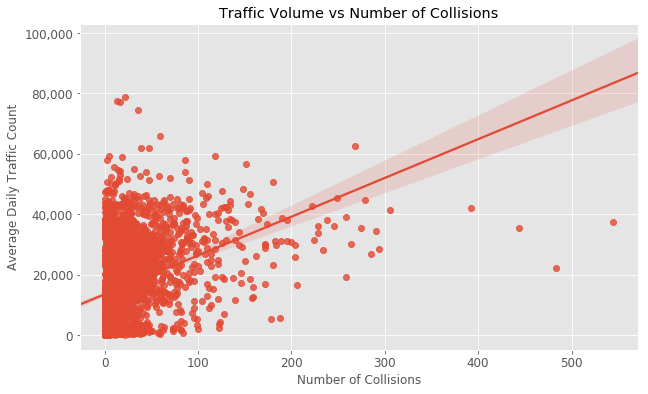

In [115]:
fig = plt.figure(figsize=(10, 6))
ax = sns.regplot(x='case_id', y='Total', data=df_count_merge)
ax.set_xlabel('Number of Collisions')
ax.set_ylabel('Average Daily Traffic Count')


fmt = '{x:,.0f}'
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(fmt))
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)

ax.set_title('Traffic Volume vs Number of Collisions')
#plt.savefig('Volume Collision Scatter.png')

pass

### Mark locations on the map

#### Top 10 collision locations

In [116]:
latlon = [ (34.1721, -118.4662), (33.9601, -118.2827), (34.1052, -118.3375), (34.0401, -118.5606), (34.2216, -118.4488), (34.0183, -118.3556), (34.2465, -118.5841), (34.0326, -118.3363), (33.9892, -118.3089), (33.9857, -118.4435)]
mapit = folium.Map( location=[34, -118.2], zoom_start=6 )
for coord in latlon:
    folium.Marker(location=[coord[0], coord[1]]).add_to(mapit)

# mapit.save('map1.html')
mapit

#### Fatal location where pedestrians were involved

In [117]:
latlon2 = [(33.9673, -118.309), (33.9983, -118.4144), (34.2283, -118.4677), (34.0234, -118.2177)]
mapit2 = folium.Map( location=[34, -118.3], zoom_start=6 )
for coord in latlon2:
    folium.Marker(location=[coord[0], coord[1]]).add_to(mapit2)

# mapit2.save('map2.html')
mapit2

#### Severe location where pedestrians were involved

In [118]:
latlon3 = [(33.7907, -118.2828), (34.0325, -118.3509)]
mapit3 = folium.Map( location=[34, -118.3], zoom_start=6 )
for coord in latlon3:
    folium.Marker(location=[coord[0], coord[1]]).add_to(mapit3)

# mapit3.save('map3.html')
mapit3